In [1]:
%matplotlib inline

from __future__ import print_function
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

#MNIST 다운로드
mnist      = input_data.read_data_sets('c:/tmp/mnistdata', one_hot=True) #숫자 하나만 선택되도록

Extracting c:/tmp/mnistdata\train-images-idx3-ubyte.gz
Extracting c:/tmp/mnistdata\train-labels-idx1-ubyte.gz
Extracting c:/tmp/mnistdata\t10k-images-idx3-ubyte.gz
Extracting c:/tmp/mnistdata\t10k-labels-idx1-ubyte.gz


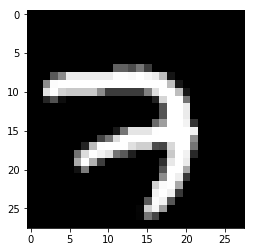

In [2]:
img = mnist.train.images[0].reshape(28,28)
plt.imshow(img, cmap='gray')

Tensor("Conv2D_1:0", shape=(1, 14, 14, 5), dtype=float32)


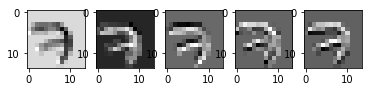

In [4]:
sess = tf.InteractiveSession() #바로바로 세션 실행 확인할 수 있음

img = img.reshape(-1,28,28,1) # MNIST 이미지를 28x28 Grey(x1)로 변형
W1 = tf.Variable(tf.random_normal([3, 3, 1, 5], stddev=0.01)) # 3x3 Grey(x1) Filter 5장 생성

#padding을 SAME으로 하면 동일 사이즈의 Feature Map 생성
#그러나 stride 2를 하므로 이미지 사이즈가 1/2로 줄어듬 (stride 1이면 사이즈 변화 없음)
conv2d = tf.nn.conv2d(img, W1, strides=[1, 2, 2, 1], padding='SAME') 
print(conv2d) #텐서 크기 찍어봄

sess.run(tf.global_variables_initializer())
conv2d_img = conv2d.eval() #eval(): 노드 바로 실행
conv2d_img = np.swapaxes(conv2d_img, 0, 3) #축 바꾸기
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

Tensor("MaxPool:0", shape=(1, 7, 7, 5), dtype=float32)


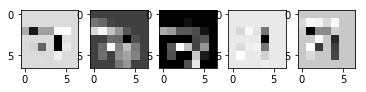

In [5]:
#NaxPooling - 사이즈: 2x2 Stride: 2칸. padding이 SAME이나 stride로 인해 크기 1/2로 축소
pool = tf.nn.max_pool(conv2d, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
print(pool)

sess.run(tf.global_variables_initializer())
pool_img = pool.eval() #eval(): 노드 바로 실행
pool_img = np.swapaxes(pool_img, 0, 3)
for i, one_img in enumerate(pool_img):
    plt.subplot(1,5,i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')